## Analysing Toronto Neighbourhoods based on population between ages 25-54

In [1]:
import pandas as pd
import requests
 
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:
 
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "6e19a90f-971c-46b3-852c-0c48c436d1fc"}
package = requests.get(url, params = params).json()
#print(package["result"])
 
# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:
 
for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        df_Toronto = pd.DataFrame(data["result"]["records"])
        break
df_Toronto

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,n/a,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,n/a,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Female parent,"128,545",1295,1110,535,725,...,550,1150,2935,565,365,635,335,330,1765,850
96,97,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Male parent,"24,055",355,250,135,170,...,90,215,505,110,65,115,95,65,310,155
97,98,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Couple census families in private households,"566,155",6775,5280,2820,5810,...,3815,4955,10960,2755,1770,2730,2640,2765,4925,2935
98,99,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Couples with children,"316,070",4250,3180,1645,1975,...,1910,2905,7055,1565,935,1405,1350,925,2960,1700


In [2]:
df_T= df_Toronto.T

df_T.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,_id,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
1,Category,Neighbourhood Information,Neighbourhood Information,Population,Population,Population,Population,Population,Population,Population,...,"Families, households and marital status","Families, households and marital status","Families, households and marital status","Families, households and marital status","Families, households and marital status","Families, households and marital status","Families, households and marital status","Families, households and marital status","Families, households and marital status","Families, households and marital status"
2,Topic,Neighbourhood Information,Neighbourhood Information,Population and dwellings,Population and dwellings,Population and dwellings,Population and dwellings,Population and dwellings,Population and dwellings,Population and dwellings,...,Family characteristics,Family characteristics,Family characteristics,Family characteristics,Family characteristics,Family characteristics,Family characteristics,Family characteristics,Family characteristics,Family characteristics
3,Data Source,City of Toronto,City of Toronto,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,...,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001
4,Characteristic,Neighbourhood Number,TSNS2020 Designation,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,...,Total number of census families in private hou...,Total couple families,Married couples,Common-law couples,Total lone-parent families by sex of parent,Female parent,Male parent,Couple census families in private households,Couples with children,1 child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Wychwood,94,No Designation,"14,349","13,986",2.60%,"6,185","5,887","8,541",1.68,...,3475,2730,2120,615,750,635,115,2730,1405,590
142,Yonge-Eglinton,100,No Designation,"11,817","10,578",11.70%,"6,103","5,676","7,162",1.65,...,3065,2640,2105,535,425,335,95,2640,1350,550
143,Yonge-St.Clair,97,No Designation,"12,528","11,652",7.50%,"7,475","7,012","10,708",1.17,...,3160,2775,2095,675,390,330,65,2765,925,455
144,York University Heights,27,NIA,"27,593","27,713",-0.40%,"11,051","10,170","2,086",13.23,...,7000,4920,4290,635,2075,1765,310,4925,2960,1260


In [3]:
#integer_location = np.where(df_toronto.index == 100)[0][0]
#start = max(0, integer_location - 55)
#end = max(1, integer_location)
df_age = df_Toronto.iloc[9:15]

df_age

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
10,11,Population,Age characteristics,Census Profile 98-316-X2016001,Youth (15-24 years),"340,270","3,705","3,360","1,235","3,750",...,"2,230","2,625","7,660","1,035",675,"1,320","1,225",920,"4,750","1,870"
11,12,Population,Age characteristics,Census Profile 98-316-X2016001,Working Age (25-54 years),"1,229,555","11,305","9,965","5,220","15,040",...,"7,480","8,140","21,945","6,165","3,790","6,420","5,860","5,960","12,290","5,860"
12,13,Population,Age characteristics,Census Profile 98-316-X2016001,Pre-retirement (55-64 years),"336,670","4,230","3,265","1,825","3,480",...,"2,070","2,905","6,245","1,625","1,150","1,595","1,325","1,540","2,965","1,810"
13,14,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),"426,945","6,045","4,105","2,015","5,910",...,"3,370","4,905","8,010","1,380","1,095","3,150","1,600","2,905","3,530","3,295"
14,15,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),"66,000",925,555,320,"1,040",...,655,885,"1,130",170,125,880,165,470,400,775


In [4]:
df_age.drop(['Topic','Category','_id','Data Source'],axis=1)

,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360","3,605","2,325","1,695","2,415",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
10,Youth (15-24 years),"340,270","3,705","3,360","1,235","3,750","2,730","1,940","6,860","2,505",...,"2,230","2,625","7,660","1,035",675,"1,320","1,225",920,"4,750","1,870"
11,Working Age (25-54 years),"1,229,555","11,305","9,965","5,220","15,040","10,810","6,655","13,065","10,310",...,"7,480","8,140","21,945","6,165","3,790","6,420","5,860","5,960","12,290","5,860"
12,Pre-retirement (55-64 years),"336,670","4,230","3,265","1,825","3,480","3,555","2,030","1,760","2,540",...,"2,070","2,905","6,245","1,625","1,150","1,595","1,325","1,540","2,965","1,810"
13,Seniors (65+ years),"426,945","6,045","4,105","2,015","5,910","6,975","2,940","2,420","3,615",...,"3,370","4,905","8,010","1,380","1,095","3,150","1,600","2,905","3,530","3,295"
14,Older Seniors (85+ years),"66,000",925,555,320,"1,040","1,640",710,330,610,...,655,885,"1,130",170,125,880,165,470,400,775


In [5]:
df_age1=df_age.T

In [6]:
df_age1

,9,10,11,12,13,14
_id,10,11,12,13,14,15
Category,Population,Population,Population,Population,Population,Population
Topic,Age characteristics,Age characteristics,Age characteristics,Age characteristics,Age characteristics,Age characteristics
Data Source,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001,Census Profile 98-316-X2016001
Characteristic,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years)
...,...,...,...,...,...,...
Wychwood,"1,860","1,320","6,420","1,595","3,150",880
Yonge-Eglinton,"1,800","1,225","5,860","1,325","1,600",165
Yonge-St.Clair,"1,210",920,"5,960","1,540","2,905",470
York University Heights,"4,045","4,750","12,290","2,965","3,530",400


In [7]:
df_age1.drop(df_age1.index[[0,1,2,3,4,5]],inplace=True)

In [8]:
df_age1.rename(columns={'10': 'Population'})

,9,10,11,12,13,14
Agincourt North,"3,840","3,705","11,305","4,230","6,045",925
Agincourt South-Malvern West,"3,075","3,360","9,965","3,265","4,105",555
Alderwood,"1,760","1,235","5,220","1,825","2,015",320
Annex,"2,360","3,750","15,040","3,480","5,910","1,040"
Banbury-Don Mills,"3,605","2,730","10,810","3,555","6,975","1,640"
...,...,...,...,...,...,...
Wychwood,"1,860","1,320","6,420","1,595","3,150",880
Yonge-Eglinton,"1,800","1,225","5,860","1,325","1,600",165
Yonge-St.Clair,"1,210",920,"5,960","1,540","2,905",470
York University Heights,"4,045","4,750","12,290","2,965","3,530",400


In [9]:
df_age1.dtypes

9     object
10    object
11    object
12    object
13    object
14    object
dtype: object

In [10]:
#df_age1.rename(columns={'10': 'Population'})

df_age1.columns.names = ['Neighbourhood']


In [11]:
#df_age1.rename(columns={'10': 'Population'})

df_123 = df_age1.rename(columns={df_age1.columns[2]:'Population'})

In [12]:
df_123 =  df_123[['Population']] #working age 25-54

In [13]:
df_123

Neighbourhood,Population
Agincourt North,"11,305"
Agincourt South-Malvern West,"9,965"
Alderwood,"5,220"
Annex,"15,040"
Banbury-Don Mills,"10,810"
...,...
Wychwood,"6,420"
Yonge-Eglinton,"5,860"
Yonge-St.Clair,"5,960"
York University Heights,"12,290"


In [14]:
df_123['Population']=df_123['Population'].str.replace(',','')




In [15]:
df_123['Population'] = df_123['Population'].astype(float)


In [16]:
df_123.dtypes

Neighbourhood
Population    float64
dtype: object

In [17]:
df_123.sort_values(by=['Population'], inplace=True, ascending=False)


In [18]:
df_neighbourhood= df_123.head(15)

In [19]:
df_neighbourhood

Neighbourhood,Population
Waterfront Communities-The Island,45105.0
Willowdale East,25850.0
Niagara,23320.0
Woburn,21945.0
Islington-City Centre West,20640.0
Dovercourt-Wallace Emerson-Junction,19790.0
Church-Yonge Corridor,18780.0
Rouge,18510.0
Malvern,17865.0
Mimico (includes Humber Bay Shores),17695.0


In [20]:

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt



### Bar Chart for Toronto Neighbourhoods

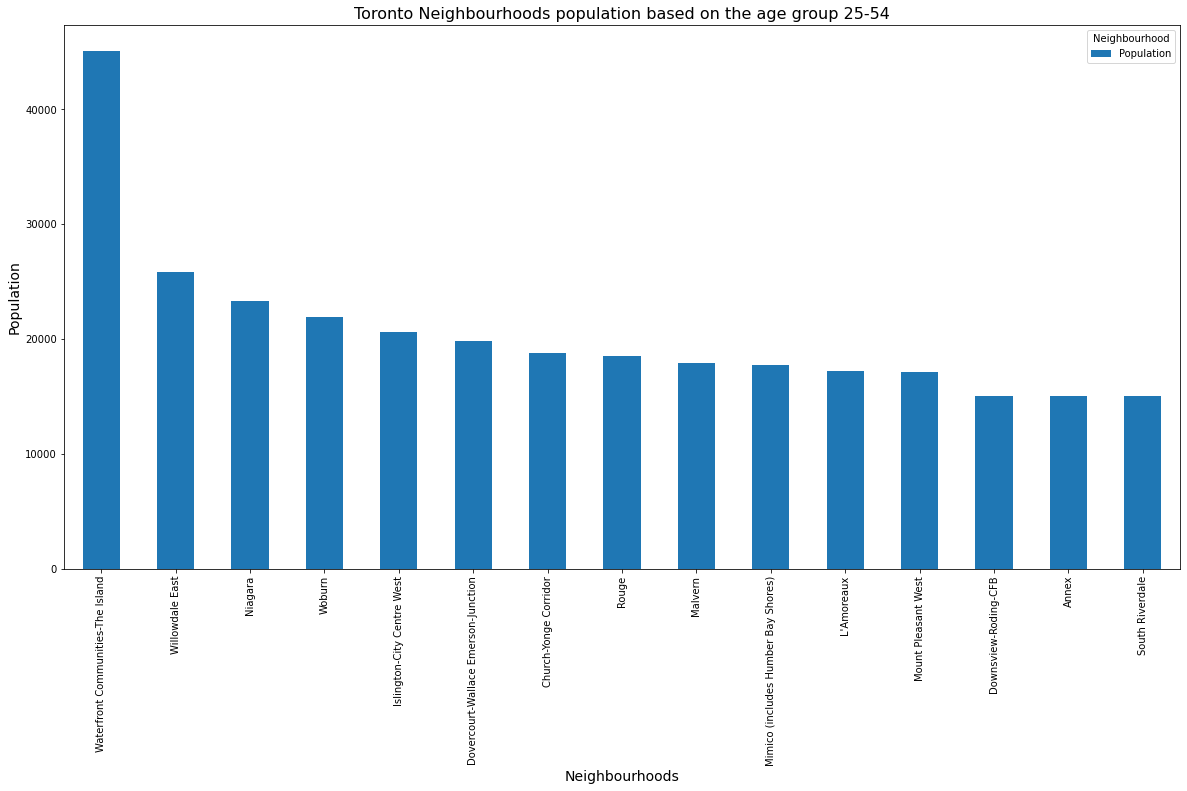

In [24]:
df_neighbourhood.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Toronto Neighbourhoods population based on the age group 25-54', fontsize=16)
plt.ylabel('Population',fontsize=14)
plt.xlabel('Neighbourhoods',fontsize=14)

plt.show()


In [26]:
df_neighbourhood=df_neighbourhood('Neighbourhood',1)

TypeError: 'DataFrame' object is not callable